In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
df2018_path = "national_M2018_dl.csv"
df2019_path = "national_M2019_dl_upper_headings.csv"
df2020_path = "national_M2020_dl.csv"
df2021_path = "national_M2021_dl.csv"

# Read the data files
df2018 = pd.read_csv(df2018_path)
df2019 = pd.read_csv(df2019_path)
df2020 = pd.read_csv(df2020_path)
df2021 = pd.read_csv(df2021_path)

# Add year data into the respective DataFrames
df2018["Year"] = 2018
df2019["Year"] = 2019
df2020["Year"] = 2020
df2021["Year"] = 2021

# Combine the data into a single dataset for time series analysis
combined_data = pd.concat([df2018, df2019, df2020, df2021], ignore_index=True)

# Rename columns for readability
combined_data.rename(columns={"OCC_TITLE":"Occupations", "TOT_EMP":"Number Employed", "H_MEAN":"Mean Hourly Wage", "A_MEAN":"Mean Annual Wage"}, inplace=True)

# Display the data table for preview
combined_data

,OCC_CODE,Occupations,OCC_GROUP,Number Employed,EMP_PRSE,Mean Hourly Wage,Mean Annual Wage,MEAN_PRSE,H_PCT10,H_PCT25,...,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,O_GROUP,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,PRIM_STATE,PCT_RPT
0,00-0000,All Occupations,total,"144,733,270",0.1,24.98,"51,960",0.1,9.95,12.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11-0000,Management Occupations,major,"7,616,650",0.2,58.44,"121,560",0.1,23.68,34.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11-1000,Top Executives,minor,"2,535,640",0.3,61.66,"128,240",0.2,20.86,31.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-1010,Chief Executives,broad,"195,530",0.7,96.22,"200,140",0.5,32.86,55.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11-1011,Chief Executives,detailed,"195,530",0.7,96.22,"200,140",0.5,32.86,55.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,53-7081,Refuse and Recyclable Material Collectors,NaN,"126,050",1.5,20.57,"42,780",0.7,11.99,14.56,...,0.0,Cross-industry,cross-industry,1235.0,detailed,NaN,NaN,NaN,US,NaN
5436,53-7120,"Tank Car, Truck, and Ship Loaders",NaN,"12,090",6.8,26.60,"55,330",2.6,15.91,18.54,...,0.0,Cross-industry,cross-industry,1235.0,broad,NaN,NaN,NaN,US,NaN
5437,53-7121,"Tank Car, Truck, and Ship Loaders",NaN,"12,090",6.8,26.60,"55,330",2.6,15.91,18.54,...,0.0,Cross-industry,cross-industry,1235.0,detailed,NaN,NaN,NaN,US,NaN
5438,53-7190,Miscellaneous Material Moving Workers,NaN,"22,470",4.7,19.32,"40,190",1.8,13.68,14.40,...,0.0,Cross-industry,cross-industry,1235.0,broad,NaN,NaN,NaN,US,NaN


In [2]:
#combined_data["Number Employed"] = combined_data["Number Employed"].str.replace(',','').astype('int')
#combined_data["Mean Annual Wage"] = combined_data["Mean Annual Wage"].str.replace(',','').astype('int')
#combined_data["Mean Hourly Wage"] = combined_data["Mean Hourly Wage"].astype('float')
# This converts string data to numeric in a way where data that can't be converted is stored as NaN, which dropna()
# can use to discard garbage data.
combined_data["Mean Annual Wage"] = pd.to_numeric(combined_data["Mean Annual Wage"].str.replace(',',''), errors="coerce")
combined_data["Number Employed"] = pd.to_numeric(combined_data["Number Employed"].str.replace(',',''), errors="coerce")

combined_data = combined_data.dropna(subset=['Number Employed', "Mean Annual Wage"])

In [3]:
combined_data

,OCC_CODE,Occupations,OCC_GROUP,Number Employed,EMP_PRSE,Mean Hourly Wage,Mean Annual Wage,MEAN_PRSE,H_PCT10,H_PCT25,...,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,O_GROUP,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,PRIM_STATE,PCT_RPT
0,00-0000,All Occupations,total,144733270.0,0.1,24.98,51960.0,0.1,9.95,12.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11-0000,Management Occupations,major,7616650.0,0.2,58.44,121560.0,0.1,23.68,34.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11-1000,Top Executives,minor,2535640.0,0.3,61.66,128240.0,0.2,20.86,31.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-1010,Chief Executives,broad,195530.0,0.7,96.22,200140.0,0.5,32.86,55.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11-1011,Chief Executives,detailed,195530.0,0.7,96.22,200140.0,0.5,32.86,55.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,53-7081,Refuse and Recyclable Material Collectors,NaN,126050.0,1.5,20.57,42780.0,0.7,11.99,14.56,...,0.0,Cross-industry,cross-industry,1235.0,detailed,NaN,NaN,NaN,US,NaN
5436,53-7120,"Tank Car, Truck, and Ship Loaders",NaN,12090.0,6.8,26.60,55330.0,2.6,15.91,18.54,...,0.0,Cross-industry,cross-industry,1235.0,broad,NaN,NaN,NaN,US,NaN
5437,53-7121,"Tank Car, Truck, and Ship Loaders",NaN,12090.0,6.8,26.60,55330.0,2.6,15.91,18.54,...,0.0,Cross-industry,cross-industry,1235.0,detailed,NaN,NaN,NaN,US,NaN
5438,53-7190,Miscellaneous Material Moving Workers,NaN,22470.0,4.7,19.32,40190.0,1.8,13.68,14.40,...,0.0,Cross-industry,cross-industry,1235.0,broad,NaN,NaN,NaN,US,NaN


In [4]:
# Select all data where the occupation title contains the word "Analyst"
analysts = combined_data[combined_data["Occupations"].str.contains("Analyst")]

analysts.head()

,OCC_CODE,Occupations,OCC_GROUP,Number Employed,EMP_PRSE,Mean Hourly Wage,Mean Annual Wage,MEAN_PRSE,H_PCT10,H_PCT25,...,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,O_GROUP,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,PRIM_STATE,PCT_RPT
89,13-1110,Management Analysts,broad,684470.0,0.8,45.38,94390.0,0.5,23.25,30.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,13-1111,Management Analysts,detailed,684470.0,0.8,45.38,94390.0,0.5,23.25,30.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,13-1160,Market Research Analysts and Marketing Special...,broad,638200.0,1.0,34.11,70960.0,0.4,16.50,22.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,13-1161,Market Research Analysts and Marketing Special...,detailed,638200.0,1.0,34.11,70960.0,0.4,16.50,22.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,13-2030,Budget Analysts,broad,52810.0,1.1,38.38,79830.0,0.6,23.97,29.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Define a function to create Linear Regression plots
def lin_regress_plot(df, x_axis, y_axis, title=None, file_name=None):
    x_values = df[x_axis]
    y_values = df[y_axis]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax = df.plot.scatter(x_axis, y_axis, grid=True, figsize=(10,8),
              marker="o", s=100)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    if title is not None:
        plt.title(title)
    else:
        plt.title(f"{x_axis} vs. {y_axis} Linear Regression")
    plt.rcParams.update({'font.size': 16})
    plt.text(0, .5, line_eq, transform=ax.transAxes, size="x-large", color="red")
    print(f"The r-value is {rvalue}")
    if file_name is not None:
        plt.savefig(file_name)
    plt.show()

The r-value is 0.1631079507864794


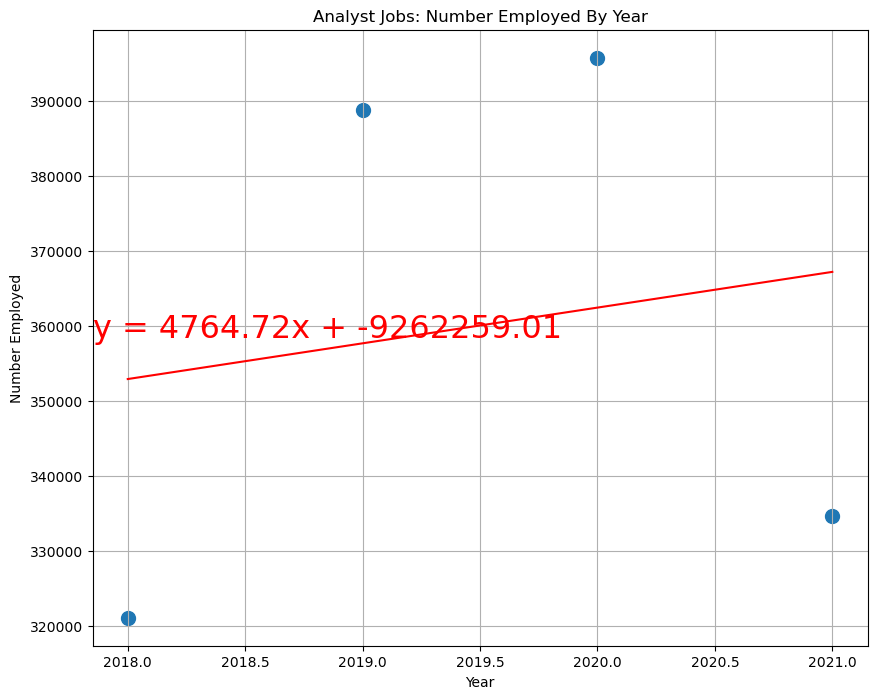

In [6]:
#analysts.groupby(["Year"])["Number Employed"].sum().plot.bar()

analyst_num_employed_by_year_df = pd.DataFrame(analysts.groupby(["Year"])["Number Employed"].mean().reset_index())
lin_regress_plot(analyst_num_employed_by_year_df, "Year", "Number Employed", title="Analyst Jobs: Number Employed By Year", file_name="figures/figure_1.png")

The r-value is 0.9218286759288064


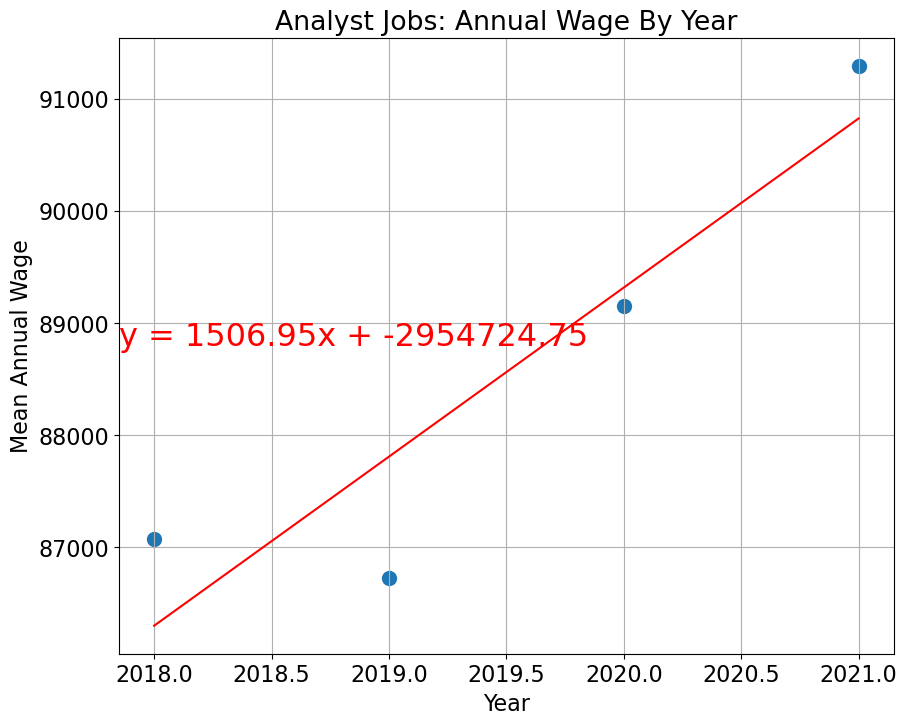

In [7]:
analyst_salaries_by_year_df = pd.DataFrame(analysts.groupby(["Year"])["Mean Annual Wage"].mean().reset_index())
lin_regress_plot(analyst_salaries_by_year_df, "Year", "Mean Annual Wage", title="Analyst Jobs: Annual Wage By Year", file_name="figures/figure_2.png")

#plt.scatter([2018, 2019, 2020, 2021], analysts.groupby(["Year"])["Mean Annual Wage"].mean())
#(slope, intercept, rvalue, pvalue, stderr) = linregress([2018, 2019, 2020, 2021], analysts.groupby(["Year"])["Mean Annual Wage"].mean())
#(slope, intercept, rvalue, pvalue, stderr)

In [8]:
# For all occupations.
all_occupations = combined_data[combined_data["Occupations"]=="All Occupations"]

all_occupations

,OCC_CODE,Occupations,OCC_GROUP,Number Employed,EMP_PRSE,Mean Hourly Wage,Mean Annual Wage,MEAN_PRSE,H_PCT10,H_PCT25,...,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,O_GROUP,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,PRIM_STATE,PCT_RPT
0,00-0000,All Occupations,total,144733270.0,0.1,24.98,51960.0,0.1,9.95,12.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1379,00-0000,All Occupations,NaN,146875480.0,0.1,25.72,53490.0,0.1,10.35,13.02,...,0.0,Cross-industry,cross-industry,1235.0,total,NaN,NaN,NaN,NaN,NaN
2708,00-0000,All Occupations,NaN,139099570.0,0.1,27.07,56310.0,0.1,10.97,13.95,...,0.0,Cross-industry,cross-industry,1235.0,total,NaN,NaN,NaN,US,NaN
4037,00-0000,All Occupations,NaN,140886310.0,0.0,28.01,58260.0,0.1,11.53,14.40,...,0.0,Cross-industry,cross-industry,1235.0,total,NaN,NaN,NaN,US,NaN


The r-value is -0.703816523181442


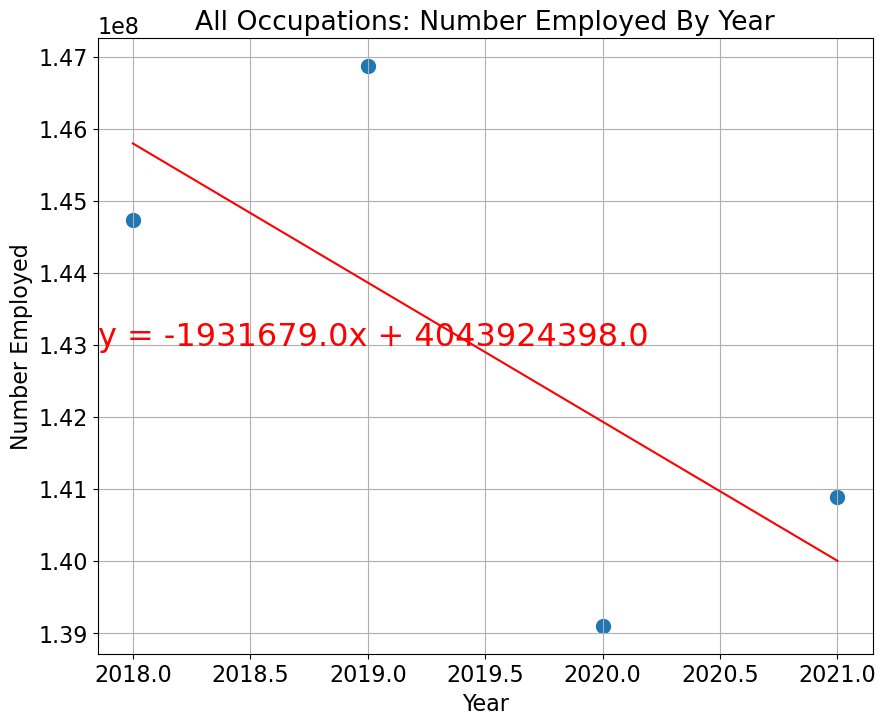

In [9]:
lin_regress_plot(all_occupations, "Year", "Number Employed", title="All Occupations: Number Employed By Year", file_name="figures/figure_3.png")

The r-value is 0.9941716488682211


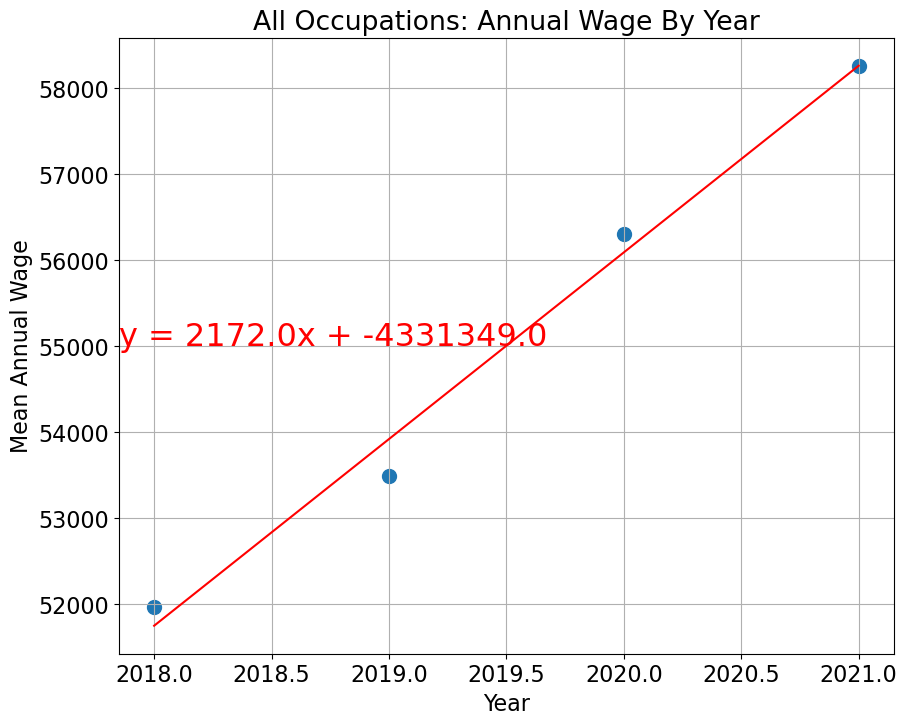

In [10]:
lin_regress_plot(all_occupations, "Year", "Mean Annual Wage", title="All Occupations: Annual Wage By Year", file_name="figures/figure_4.png")